# Setup Python environment
Import tensorflow, keras, matplotlib and numby

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Prepare and visualize data
Import CIFAR10 dataset from Kera's library

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

Visualize Dataset

In [3]:
print("Length of train dataset: " + str(len(x_train)) 
      + "\nLength of test dataset: "  + str(len(x_test)))

Length of train dataset: 50000
Length of test dataset: 10000


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:25]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2]], dtype=uint8)

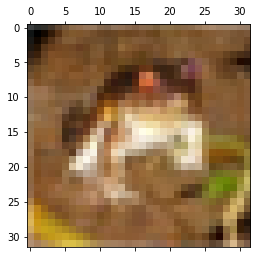

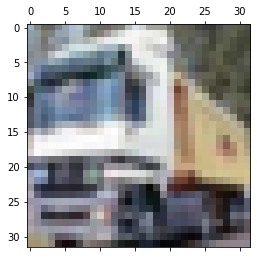

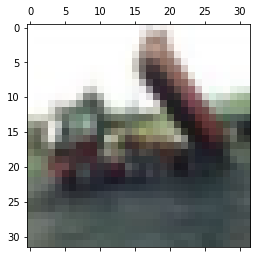

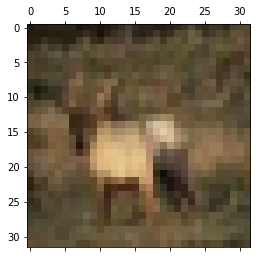

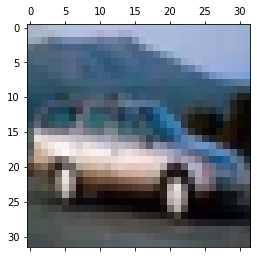

In [8]:
plt.matshow(x_train[0])
plt.matshow(x_train[1])
plt.matshow(x_train[2])
plt.matshow(x_train[3])
plt.matshow(x_train[4])

In [9]:
classifications = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print ("In order of apperance, the first 5 elements are classified as: " + classifications[y_train[0][0]]  + ", " 
       + classifications[y_train[1][0]]+ ", "  + classifications[y_train[2][0]] + ", " 
       + classifications[y_train[3][0]] + ", " + classifications[y_train[4][0]])

In order of apperance, the first 5 elements are classified as: frog, truck, truck, deer, automobile


For each X dataset: scale values by dividing by 255 to have all pixel values between 0 and 1

In [10]:
x_train_s = x_train / 255
x_test_s = x_test / 255

In [11]:
x_train_s[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

For each Y dataset: convert the integer arrays into a binary class matrix (one-hot vector)

In [12]:
y_train_hv = keras.utils.to_categorical (y_train)
y_test_hv = keras.utils.to_categorical (y_test)

In [13]:
y_train_hv[:25]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 

# Create simple CNN
Create a simple Convolutional Neural Network (CNN)

In [14]:
cnn = Sequential()

# Add convolutional layer
cnn.add (Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)))

# Add pooling layer with 2x2 pixel filter
cnn.add (MaxPooling2D(pool_size=(2,2)))

# Add second convoutional layer
cnn.add (Conv2D(32, (5,5), activation="relu"))

# Add seccond pooling layer with 2x2 pixel filter
cnn.add (MaxPooling2D(pool_size=(2,2)))

# Add flattening layer
cnn.add (Flatten())

# Add layer with 1000 neurons
cnn.add(Dense(1000, activation="relu"))

# Add dropout layer
cnn.add(Dropout(0.5))

# Add layer with 500 neurons
cnn.add(Dense(500, activation="relu"))

# Add dropout layer
cnn.add(Dropout(0.5))

# Add layer with 250 neurons
cnn.add(Dense(250, activation="relu"))

# Add layer with 10 neurons
cnn.add(Dense(10, activation="softmax"))

Compile CNN

In [15]:
cnn.compile (
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Train CNN

In [16]:
hist = cnn.fit(
    x_train_s, # input values
    y_train_hv, # output values
    batch_size = 256, # batch size
    epochs = 10, # number of iterations
    validation_split = 0.2 # reserve 20% of dataset for validation
)

Epoch 1/10
157/157 [==============================] - 402s 3s/step - loss: 1.7962 - accuracy: 0.3241 - val_loss: 1.4885 - val_accuracy: 0.4564
Epoch 2/10
157/157 [==============================] - 378s 2s/step - loss: 1.4605 - accuracy: 0.4620 - val_loss: 1.4521 - val_accuracy: 0.4778
Epoch 3/10
157/157 [==============================] - 407s 3s/step - loss: 1.3072 - accuracy: 0.5281 - val_loss: 1.3062 - val_accuracy: 0.5338
Epoch 4/10
157/157 [==============================] - 362s 2s/step - loss: 1.2198 - accuracy: 0.5634 - val_loss: 1.1908 - val_accuracy: 0.5735
Epoch 5/10
157/157 [==============================] - 363s 2s/step - loss: 1.1452 - accuracy: 0.5914 - val_loss: 1.0797 - val_accuracy: 0.6185
Epoch 6/10
157/157 [==============================] - 365s 2s/step - loss: 1.0662 - accuracy: 0.6167 - val_loss: 1.0199 - val_accuracy: 0.6403
Epoch 7/10
157/157 [==============================] - 368s 2s/step - loss: 1.0200 - accuracy: 0.6395 - val_loss: 1.0341 - val_accuracy: 0.6404

Evaluate model

In [17]:
cnn.evaluate(x_test_s, y_test_hv)[0]

313/313 [==============================] - 38s 120ms/step - loss: 0.9461 - accuracy: 0.6716


0.9460548758506775

Visualize accuracy and loss of the model during training epochs

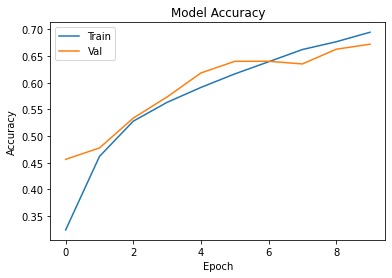

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

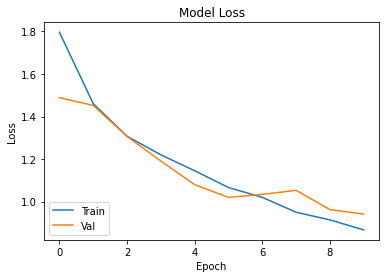

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower left')
plt.show()

Summary

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              801000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

In [21]:
predictions = cnn.predict(x_train_s)

Visualize prediction solution

In [22]:
predictions

array([[2.6975675e-03, 2.4243980e-03, 8.5919425e-02, ..., 1.7023997e-02,
        6.4693880e-04, 5.8702226e-03],
       [1.2872147e-03, 1.1869896e-02, 2.1855682e-04, ..., 4.9457405e-05,
        7.9005875e-04, 9.8571056e-01],
       [5.1210441e-02, 1.5560119e-02, 8.0354391e-03, ..., 1.6785584e-02,
        5.5154050e-03, 8.7175101e-01],
       ...,
       [3.3684924e-02, 6.3709676e-02, 5.4441026e-04, ..., 6.1986782e-04,
        4.6634950e-02, 8.5366917e-01],
       [8.7265680e-03, 8.7391782e-01, 2.7616808e-05, ..., 5.5413261e-06,
        1.9515174e-02, 9.7776003e-02],
       [7.0639074e-02, 3.2546717e-01, 1.6351515e-02, ..., 1.8618537e-02,
        4.3361600e-02, 4.6822736e-01]], dtype=float32)

Parse prediction solution to simple array using NumPy argmax to find the index of the most likely solution for each prediction

In [70]:
predictions_labels = [np.argmax(prediction) for prediction in predictions]
predictions_labels[:26]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 3, 6, 4, 3, 6, 6, 2, 3]

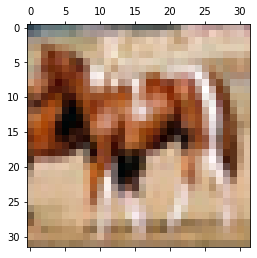

In [72]:
sample = 114
plt.matshow(x_train[sample])

In [73]:
classifications[predictions_labels[sample]]

'horse'

Build confusion matrix using tensorflow library

<AxesSubplot:>

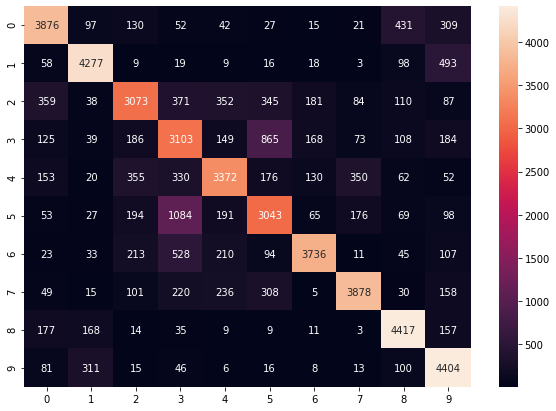

In [78]:
truth_labels = [np.argmax(prediction) for prediction in y_train_hv]

confusion_matrix = tf.math.confusion_matrix(
    labels=truth_labels, # truth predictions
    predictions=predictions_labelss # model predictions
)
plt.figure(figsize = (10,7))
plt.xlabel('Predicted Value')
plt.ylabel('Truth Value')
sb.heatmap (confusion_matrix, annot=True, fmt='d')